# Student Admission

In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')

In [27]:
print(data.head())

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [28]:
X = data.iloc[:,[1,2,3]]
y = data.iloc[:,[0]]
X = minmax_scale(X, feature_range=(0, 1))
X

array([[0.27586207, 0.77586207, 0.66666667],
       [0.75862069, 0.81034483, 0.66666667],
       [1.        , 1.        , 0.        ],
       ...,
       [0.4137931 , 0.21264368, 0.33333333],
       [0.82758621, 0.79885057, 0.33333333],
       [0.65517241, 0.93678161, 0.66666667]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape

((280, 3), (280, 1))

In [30]:
n_features = 3
n_labels = 1

features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

w = tf.Variable(tf.random_normal((n_features, n_labels)), name='Weights')
b = tf.Variable(tf.zeros(n_labels), name='Bias')

linear = tf.add(tf.matmul(features, w),b)

In [37]:
loss_ = []
with tf.device('/dml:0'):
    with tf.Session() as sess:
        for i in range(10):
            prediction = tf.nn.sigmoid(linear)

            cross_entropy = -tf.reduce_sum(labels*tf.log(prediction), reduction_indices=1)

            loss = tf.reduce_mean(cross_entropy)

            optim = tf.train.AdagradOptimizer(0.0001).minimize(loss)
            sess.run(tf.global_variables_initializer())
            _, l = sess.run([optim, loss],
                            feed_dict={features: X_train, labels: y_train})
            loss_.append(l)
        print(sess.run(w))

print(f'Loss : {l, loss_}')

[[ 1.3999653]
 [ 1.2438436]
 [-1.2048147]]
Loss : (0.08077306, [0.4517675, 0.695833, 0.11230984, 0.033330414, 0.014880082, 0.039575823, 0.24545321, 0.293776, 0.3391835, 0.08077306])


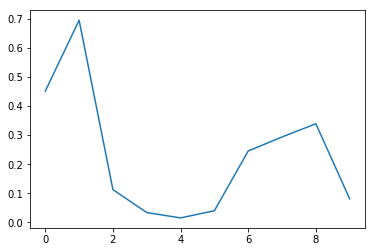

In [38]:
plt.plot(loss_)